# [EXPLORATION-01] RockPaperScissor

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import os
import glob

## PIL
* 현재 가위바위보 데이터 이미지의 크기는 224 X 224.
* 데이터 이미지의 크기를 28 x 28 로 줄이기 위해 PIL 라이브러리를 이용
* 또한 아래의 기능 등을 이용하기 위해 사용
    * 파일 포맷 변경
    * 이미지의 일부 부분 추출
    * 이미지 회전
    * 이미지 리사이징
    * 이미지 필터링

## glob
* glob는 파일들의 리스트를 뽑을 때 사용하는데, 파일의 경로명을 이용해서 입맛대로 사용* 
* `glob()` 함수는 인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환

# 1.1 데이터 준비

다음은 구글 티처블머신으로 직접 손을 찍은 사진이다. 다양하게 구성하기 위해 좌우반전 및 손의 모양과 위치를 조금씩 이동하여 300장의 dataset을 만들었다.
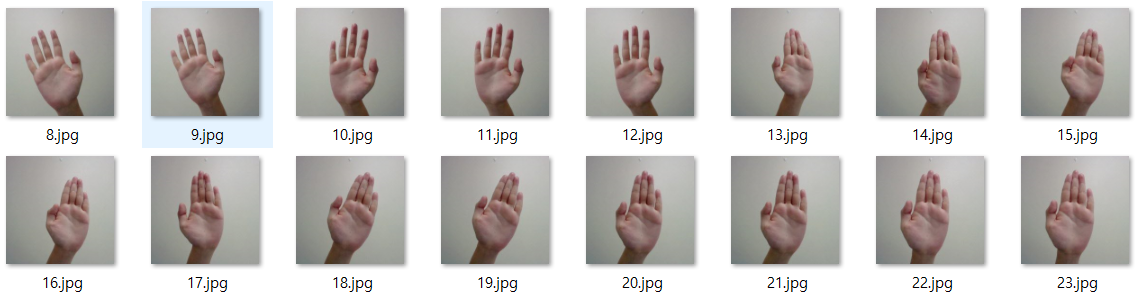


원본 이미지파일 크기인 224 X 224에서 28 X 28로 resize화 하기 위해 resize_images함수를 작성한다.

## resize_images(img_path)

* glob.glob()을 이용하여 img_path 파라미터 내부에 있는 'jpg'형식의 모든 파일을 리스트의 형식으로 images 변수에 저장

* resize를 원하는 이미지 크기를 튜플형식으로 target_size 변수에 저장

* for문으로 images 리스트를 순회

* PIL의 Image.open()함수를 이용하여 img 객체를 내부에서 open

* jpg파일의 사이즈를 28 X 28로 바꾸고, new_img 라는 변수에 초기화 및 'JPEG'형식으로 저장(덮어쓰기)

* Image.ANTIALIAS는, anti-aliasing의 줄임말로, 높은 해상도의 신호를 낮은 해상도에서 나타낼 때 생기는 계단 현상(깨진 패턴)을 최소화하는 방법


In [13]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

In [14]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first/scissor"
resize_images(image_dir_path)
print("Scissor image 28 x 28 resized is done.!\n")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first/rock"
resize_images(image_dir_path)
print("Rock image 28 x 28 resized is done.!\n")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first/paper"
resize_images(image_dir_path)
print("Paper image 28 x 28 resized is done.!\n")

100  images to be resized.
100  images resized.
Scissor image 28 x 28 resized is done.!

100  images to be resized.
100  images resized.
Rock image 28 x 28 resized is done.!

100  images to be resized.
100  images resized.
Paper image 28 x 28 resized is done.!



# 1.2 데이터 로드
클라우드 내부에 원본 또는 변환된 이미지를 로드

## load_data(img_path, number_of_data=300)
* img_path 내의 이미지를 행렬에 라벨링을 하여 저장하는 함수
* number_of_data는 이미지 개수 총합.(수정가능)
* iglob(): glob.glob은 파일경로의 배열을 반환하지만, iglob()는 glob()과 같은 값을 산출하는 이터레이터를 반환
* img_size에 이미지 크기 지정
* color에 흑백 또는 컬러 숫자 지정

In [15]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [16]:
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first"

(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


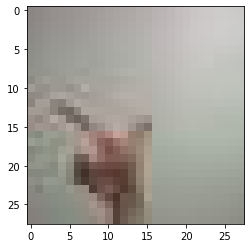

In [21]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

# 1.3 딥러닝 네트워크 설계
* Sequential 클래스의 객체를 만들고, 객체의 add()메서드를 호출하여 층을 추가
* 이미지의 특징 개수를 64, 128로 설정
* Dense는 신경망에서 가장 기본 층인 밀집층을 만드는 클래스
* Conv2D는 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스
* same패딩을 지정하여 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 사용
* 활성함수로 렐루함수 사용
* MaxPooling2D는 입력의 너비와 높이를 줄이는 풀링 연산 클래스
* Flatten은 이미지를 1차원으로 변환
* 과적합을 막도록 Dropout을 사용 

In [137]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  8
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 6272)              0         
                                                                 
 dense_52 (Dense)            

# 1.4 딥러닝 네트워크 학습
* compile은 모델 객체를 만든 후 훈련하기 전에 사용할 손실함수와 측정지표 등을 지정하는 메서드
* 이진 분류이면 'binary_crossentropy', 다중 분류이면 'categorical_crossentropy'로 지정
* 클래스 레이블이 정수일 경우 'sparse_categorical_crossentropy'로 지정
* metrics 매개변수에 훈련과정에서 측정하고 싶은 지표를 지정
* optimizer에 'adam'지정
* fit은 모델을 훈련하는 메서드, epochs 매개변수에 전체 데이터에 대해 반복할 에포크 횟수를 지정

In [138]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10)

Epoch 1/10
10/10 [==============================] - 1s 9ms/step - loss: 1.0724 - accuracy: 0.4167
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.9565 - accuracy: 0.5500
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 0.7054 - accuracy: 0.7733
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.3605 - accuracy: 0.9400
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.1800 - accuracy: 0.9600
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0707 - accuracy: 0.9933
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0438 - accuracy: 0.9933
Epoch 8/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0267 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0148 - accuracy: 1.0000


# 1.5 얼마나 잘 만들었는지 확인하기(테스트)

In [24]:
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽고 28x28로 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first_test/scissor"
resize_images(image_dir_path)
print("Scissor test image 28 x 28 resized is done.!\n")

# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽고 28x28로 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first_test/rock"
resize_images(image_dir_path)
print("Rock test image 28 x 28 resized is done.!\n")

# 보 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽고 28x28로 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first_test/paper"
resize_images(image_dir_path)
print("Paper test image 28 x 28 resized is done.!\n")

100  images to be resized.
100  images resized.
Scissor test image 28 x 28 resized is done.!

100  images to be resized.
100  images resized.
Rock test image 28 x 28 resized is done.!

100  images to be resized.
100  images resized.
Paper test image 28 x 28 resized is done.!



## load_test_data(img_path, number_of_data = 300):
* 위의 load_data와 작동이 동일.
* 테스트 데이터를 로드하는 함수

In [25]:
def load_test_data(img_path, number_of_data = 300):
    img_size = 28
    color = 3
    
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2
        idx = idx + 1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [26]:
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_first_test"

(x_test, y_test) = load_test_data(image_dir_path)

x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [139]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.2578 - accuracy: 0.7900 - 184ms/epoch - 18ms/step
test_loss: 1.2577602863311768 
test_accuracy: 0.7900000214576721


# 1.6 첫번째 시도 결론

가위, 바위, 보 이미지 데이터를 각각 100장씩 총 300장으로 train dataset을 구성하였다. 다음은 학습한 결과를 바탕으로 test dataset 300장을 구성하여 평가를 한 결과이다.

* test_loss : 1.258 
* test_accuracy: 0.79

루브릭 평가기준은 다음과 같다.
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
    
        Yes. 훈련이 정상적으로 수행됨

2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?

        오버피팅이 되지 않도록 정규화 및 드랍아웃을 진행함

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?

        test accuracy가 79%로 측정되었음

# 2.1 두번째 시도
loss값을 줄이고 accuracy를 늘릴수 있을 것 같은데, 위와 같이 나온이유는 다음과 같이 생각한다.

1. 데이터의 부족

    근본적으로 데이터가 300장 밖에 되지 않기 때문에 정확도가 79% 나왔지만 과연 이 모델이 믿을만 한지 판단이 되지 않는다. 그러므로 데이터를 300장에서 약 3000장으로 학습을 시키면 정확도와 loss값이 개선될 듯 하다.
        
2. 데이터 resize

    원 데이터가 224 x 224이지만 28 x 28로 줄였기 때문에 사진의 특성을 잘  뽑아내는데 부족하다고 판단된다. 그러므로 resize를 하여 128 x 128로 하여 시도하면 개선될 듯 하다.

데이터 추가를 위해 텐서플로우에 공개되어있는 데이터를 합쳐서 진행한다.
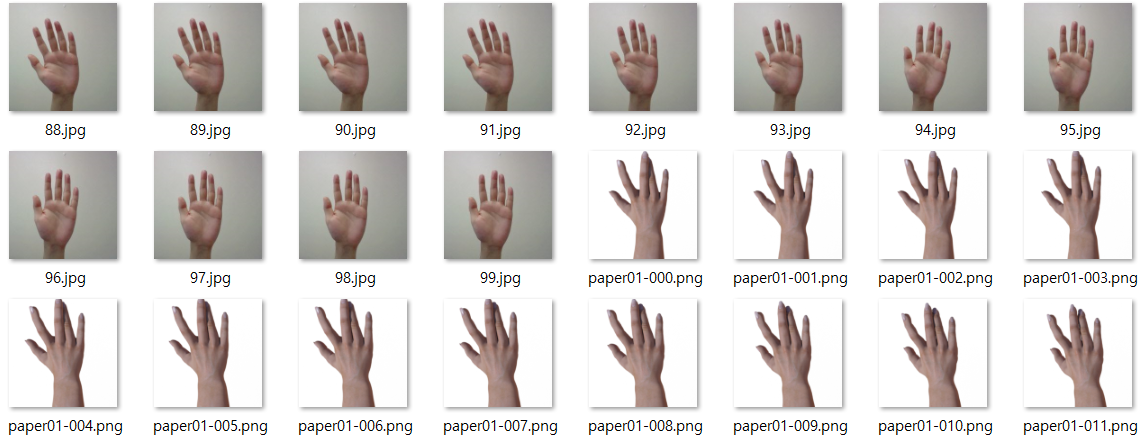

# 2.2 데이터 전처리
png_to_jpg(img_path):
* 텐서플로우 데이터는 png파일이기 때문에 png file을 jpg file로 변환하는 함수이다.
* PIL모듈을 이용하여 약간의 문자열 변환을 통해 save함수로 저장한다.

In [80]:
from PIL import Image

def png_to_jpg(img_path):
    images=glob.glob(img_path + "/*.png")
    
    print(len(images), " png images to be jpg.")
    
    # png_to_jpg
    for img in images:
        png_image=Image.open(img).convert('RGB')
        
        img=img.split('.')[0] + '.jpg'
        
        png_image.save(img, "jpeg")
        
    print(len(images), " To png images convert to jpg is done.")

In [81]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 png파일을 읽어서 jpg 파일로 변환 및 저장
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_second/scissor"
png_to_jpg(image_dir_path)
print("To Scissor png images convert to jpg is done.!\n")

# 바위 이미지가 저장된 디렉토리 아래의 모든 png파일을 읽어서 jpg 파일로 변환 및 저장
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_second/rock"
png_to_jpg(image_dir_path)
print("To Rock png images convert to jpg is done..!\n")

# 가위 이미지가 저장된 디렉토리 아래의 모든 png파일을 읽어서 jpg 파일로 변환 및 저장
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_second/paper"
png_to_jpg(image_dir_path)
print("To Paper png images convert to jpg is done.!\n")

964  png images to be jpg.
964  To png images convert to jpg is done.
To Scissor png images convert to jpg is done.!

964  png images to be jpg.
964  To png images convert to jpg is done.
To Rock png images convert to jpg is done..!

964  png images to be jpg.
964  To png images convert to jpg is done.
To Paper png images convert to jpg is done.!



위에서 정의했던 resize_images함수에서 128x128사이즈로 변환하기 위해 target_size값만 바꾸고 함수를 재정의

In [82]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
    target_size=(128,128)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

In [83]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_second/scissor"
resize_images(image_dir_path)
print("Scissor image 128 x 128 resized is done.!\n")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path =  "/content/drive/MyDrive/aiffel/rock_scissor_paper_second/rock"
resize_images(image_dir_path)
print("Rock image 128 x 128 resized is done.!\n")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_second/paper"
resize_images(image_dir_path)
print("Paper image 128 x 128 resized is done.!\n")

1064  images to be resized.
1064  images resized.
Scissor image 128 x 128 resized is done.!

1064  images to be resized.
1064  images resized.
Rock image 128 x 128 resized is done.!

1064  images to be resized.
1064  images resized.
Paper image 128 x 128 resized is done.!



위에서 정의했던 load_data함수에서 128x128사이즈로 shape 및 라벨링을 위해 img_size값과 number_of_data를 수정하고 함수를 재정의


In [84]:
import numpy as np

def load_data(img_path, number_of_data=3192):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=128
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# 2.3 딥러닝 네트워크 설계 및 학습
* 기존의 train과 test를 각각 다른파일에 나눠서 저장하지 않고 통합한다음 sklearn.model_selection의 train_test_split함수를 사용하여 데이터를 추출
* train_test_split함수 사용이 자동으로 shuffle을 해주기 때문에 데이터의 편향을 막아주고, 랜덤성의 원리에 따라 학습이 잘 될 것이라 판단됨.
* test_size=0.2로 설정하여 train 80%, test 20%로 적절하게 배분
* 딥러닝 설계는 첫번째 시도와 동일한 설계이다.

In [122]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_second"
(data_input, data_target)=load_data(image_dir_path, number_of_data=3192)

print("data_input shape: {}".format(data_input.shape))
print("data_target shape: {}\n".format(data_target.shape))

# 훈련data 테스트data
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, test_size=0.2)

train_scaled = data_input/255.0


print("train_scaled shape: {}".format(train_scaled.shape))
print("test_input shape: {}".format(test_input.shape))
print("train_target shape: {}".format(train_target.shape))
print("test_target shape: {}\n".format(test_target.shape))

학습데이터(x_train)의 이미지 개수는 3192 입니다.
data_input shape: (3192, 128, 128, 3)
data_target shape: (3192,)

train_scaled shape: (3192, 128, 128, 3)
test_input shape: (639, 128, 128, 3)
train_target shape: (2553,)
test_target shape: (639,)



In [123]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3)))
model3.add(keras.layers.MaxPooling2D(2))
model3.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model3.add(keras.layers.MaxPooling2D(2))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(100, activation='relu'))
model3.add(keras.layers.Dropout(0.4))
model3.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model3.layers))

model3.summary()

Model에 추가된 Layer 개수:  8
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 65536)             0         
                                                                 
 dense_44 (Dense)            

In [124]:
model3.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model3.fit(train_input, train_target, epochs = 10)

Epoch 1/10
80/80 [==============================] - 3s 36ms/step - loss: 138.1821 - accuracy: 0.6204
Epoch 2/10
80/80 [==============================] - 2s 31ms/step - loss: 0.2475 - accuracy: 0.9264
Epoch 3/10
80/80 [==============================] - 2s 31ms/step - loss: 0.1032 - accuracy: 0.9710
Epoch 4/10
80/80 [==============================] - 2s 31ms/step - loss: 0.0382 - accuracy: 0.9867
Epoch 5/10
80/80 [==============================] - 2s 31ms/step - loss: 0.0373 - accuracy: 0.9898
Epoch 6/10
80/80 [==============================] - 2s 31ms/step - loss: 0.0443 - accuracy: 0.9879
Epoch 7/10
80/80 [==============================] - 2s 31ms/step - loss: 0.0206 - accuracy: 0.9953
Epoch 8/10
80/80 [==============================] - 3s 31ms/step - loss: 0.0395 - accuracy: 0.9918
Epoch 9/10
80/80 [==============================] - 2s 31ms/step - loss: 0.0564 - accuracy: 0.9886
Epoch 10/10
80/80 [==============================] - 2s 31ms/step - loss: 0.0114 - accuracy: 0.9965


# 2.4 Test

In [125]:
test_scaled = test_input/255.0 # 표준화

model3.evaluate(test_scaled, test_target)

20/20 [==============================] - 0s 15ms/step - loss: 0.9364 - accuracy: 0.9546


[0.9364063143730164, 0.9546166062355042]

# 2.5 두번째 시도 결론

가위, 바위, 보 이미지 데이터를 각각 1064장씩 총 3192장으로 dataset을 구성하였다. 이후 3192장을 train 과 test데이터로 각각 80%, 20% 비율로 분할하였다. 다음은 학습한 결과를 바탕으로 test dataset으로 평가를 한 결과이다.

* first test_loss : 1.258 
* first test_accuracy: 0.79


* **second test_loss : 0.9364**
* **second test_accuracy: 0.9546**


루브릭 평가기준은 다음과 같다.
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
    
        Yes. 훈련이 정상적으로 수행됨

2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?

        오버피팅이 되지 않도록 정규화 및 드랍아웃, 그리고 데이터를 늘려서 진행함

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?

        test accuracy가 95%로 측정되었음



# 3.1 세번째 시도
loss값이 줄어들고 accuracy가 향상되었다. 하지만 떨쳐버릴 수 없은 의문점들이 생겨났다.

1. 검증용 데이터

    * 데이터가 많아지고, 훈련을 시켜 최종 테스트세트에서 모델을 평가했다. 테스트세트는 모델의 일반화 성능을 가늠해 볼 수 있는것인데, 테스트 세트를 사용해 계속해서 성능을 확인하니 뭔가 테스트 세트에 맞추게 되는 느낌이다.
    * 구글 검색결과 테스트 세트로 일반화 성능을 올바르게 예측하려면 가능한 한 테스트 세트를 사용하지 말고, 모델을 만들고 나서 마지막에 딱 한 번만 사용하는 것이 좋다고 한다.
    * 또한 과대적합인지 과소적합인지 판단하기 위해서 validation set를 사용한다고 한다. 이때 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델을 고르고 나서 마지막에 테스트 세트에서 최종 점수를 평가하는 것이 좋다. 왜냐하면 실제 모델 적용시 테스트 세트의 점수와 비슷한 성능을 기대할 수 있기 때문이다.


2. 언제까지 에포크??

    * 에포크는 hyper parameter로 임의로 지정한다. 하지만 에포크를 많이 돌리면 돌릴수록 과적합에 빠지기 쉽다. 그렇다면 과적합에 빠지기 전 중단을 하면 좋지 않을까


두번째 시도했던 데이터로 진행을 해본다.

# 3.2 train, validation, test 데이터 분할
* train과 test데이터를 80:20으로 먼저 분할을 해준다.
* 이후 분리된 train데이터를 또다시 train과 validation 데이터로 80:20으로 분할을 해준다.
* 이때 학습 및 검증용 데이터 분할전 데이터 정규화를 실시

In [85]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper_second"
(data_input, data_target)=load_data(image_dir_path)

print("data_input shape: {}".format(data_input.shape))
print("data_target shape: {}\n".format(data_target.shape))

# 훈련data 테스트data
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, test_size=0.2)

print("train_input shape: {}".format(train_input.shape))
print("test_input shape: {}".format(test_input.shape))
print("train_target shape: {}".format(train_target.shape))
print("test_target shape: {}\n".format(test_target.shape))

train_scaled = train_input/255.0

#훈련data 검증data
main_train_scaled, val_scaled, main_train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

print("train_scaled shape: {}".format(main_train_scaled.shape))
print("val_scaled shape: {}".format(val_scaled.shape))
print("train_target shape: {}".format(main_train_target.shape))
print("val_target shape: {}".format(val_target.shape))

학습데이터(x_train)의 이미지 개수는 3192 입니다.
data_input shape: (3192, 128, 128, 3)
data_target shape: (3192,)

train_input shape: (2553, 128, 128, 3)
test_input shape: (639, 128, 128, 3)
train_target shape: (2553,)
test_target shape: (639,)

train_scaled shape: (2042, 128, 128, 3)
val_scaled shape: (511, 128, 128, 3)
train_target shape: (2042,)
val_target shape: (511,)


라벨:  1


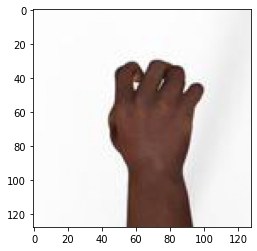

In [90]:
plt.imshow(main_train_scaled[4])
print('라벨: ', main_train_target[4])

# 3.3 딥러닝 네트워크 설계

* 딥러닝 설계는 첫, 두번째 시도와 동일한 설계이다.

In [114]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model2=keras.models.Sequential()
model2.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3)))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dropout(0.4))
model2.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model2.layers))

model2.summary()

Model에 추가된 Layer 개수:  8
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 65536)             0         
                                                                 
 dense_42 (Dense)            

# 3.4 딥러닝 네트워크 학습
* 콜백은 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구로 최상의 모델을 자동으로 저장 및 조기종료를 사용할 수 있다.
* ModelCheckpoint는 모델과 가중치를 일정 간격으로 저장하며, save_brst_only를 지정해 가장 낮은 검증 점수를 만드는 모델을 저장한다.
* 조기종료란 과대적합이 시작되기 전에 훈련을 미리 중지하는 기법
* EarlyStopping을 만들어 조기종료기법 수행
* patience는 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정
* restore_best_weights는 매개변수에 최상의 모델 가중치를 복원할지 지정
* history 객체에 훈련과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음 또한 추가 가능

In [115]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model2.fit(main_train_scaled, main_train_target, epochs=10,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
64/64 [==============================] - 3s 44ms/step - loss: 1.1791 - accuracy: 0.5847 - val_loss: 0.3707 - val_accuracy: 0.9139
Epoch 2/10
64/64 [==============================] - 3s 39ms/step - loss: 0.2206 - accuracy: 0.9334 - val_loss: 0.1305 - val_accuracy: 0.9726
Epoch 3/10
64/64 [==============================] - 2s 38ms/step - loss: 0.0908 - accuracy: 0.9736 - val_loss: 0.0422 - val_accuracy: 0.9902
Epoch 4/10
64/64 [==============================] - 2s 37ms/step - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.0264 - val_accuracy: 0.9883
Epoch 5/10
64/64 [==============================] - 2s 38ms/step - loss: 0.0224 - accuracy: 0.9946 - val_loss: 0.0257 - val_accuracy: 0.9883
Epoch 6/10
64/64 [==============================] - 2s 37ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.0137 - val_accuracy: 0.9980
Epoch 7/10
64/64 [==============================] - 2s 37ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 8/10
64

# 3.5 검증데이터로 test

train and validation loss score graph

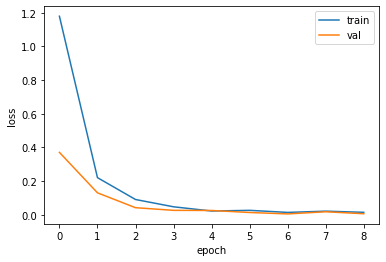

In [117]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [118]:
model2.evaluate(val_scaled, val_target)

16/16 [==============================] - 0s 14ms/step - loss: 0.0052 - accuracy: 0.9980


[0.0052327425219118595, 0.9980430603027344]

# 3.6 최종 test

In [119]:
test_scaled = test_input/255.0

In [120]:
model2.evaluate(test_scaled, test_target)

20/20 [==============================] - 0s 14ms/step - loss: 0.0066 - accuracy: 0.9969


[0.0065750000067055225, 0.9968701004981995]

# 3.7 세번째 시도 결론

가위, 바위, 보 이미지 데이터를 각각 1064장씩 총 3192장으로 dataset을 구성하였다. 이후 3192장을 train과 test데이터로 각각 80%, 20% 비율로 분할하고 또다시 train에서 train과 validation데이터로 각각 80%, 20% 비율로 분할했다. 이후 콜백함수를 지정해서 가장 좋은 모델을 찾아서 저장한 후, 해당 모델로 학습한 결과를 바탕으로 test dataset으로 평가를 한 결과이다.

* first test_loss : 1.258 
* first test_accuracy: 0.79


* second test_loss : 0.9364
* second test_accuracy: 0.9546


* **third val_loss : 0.0052**
* **third val_accuracy: 0.9980**
* **third test_loss : 0.0066**
* **third test_accuracy: 0.9968**


루브릭 평가기준은 다음과 같다.
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
    
        Yes. 훈련이 정상적으로 수행됨

2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?

        오버피팅이 되지 않도록 정규화 및 드랍아웃, 검증데이터 분리 그리고 데이터를 늘려서 진행함

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?

        test accuracy가 99%로 측정되었음



# 4. 추가생각

# 데이터의 다양성
* 현재의 데이터는 정면에서 찍어서 약간의 모양과 각도 및 좌우반전을 하여 약 3000여개의 dataset을 구축했다. 하지만 이외에도 다양한 이미지를 생각해볼 수 있을 것 같다.
* 먼저 이미지 회전이다.현재의 이미지에서, 이미지 마다 1도~360도 회전한 이미지를 생성하면 데이터가 많아질 것이다.
* 이미지의 색상. 각 이미지마다 RGB를 변경하여 이미지를 생성하면 데이터가 많아질 것이다.
* 이미지의 모양각도 및 이미지 뒤집기, 채도 및 명도 등등 여러가지를 생각할 수 있다.
* 또한 한 사람이 만든 데이터는 편향(bias)되기 쉬우니 여러명의 손모양 데이터를 얻어서 진행해 볼 수 있다.
* 데이터를 많이구축한 상태에서 학습을 진행한다면 더욱 더 견고한 모델이 나오지 않을까 생각해본다.

# 데이터의 Size
* 28x28 이미지로 학습을 시켰을때와, 128x128이미지를 이용하여 학습을 시켰을때 후자의 성능이 더 좋았다. 하지만 이미지 size가 커지면 학습에 소요되는 시간이 증가하였다.
* 더욱 더 다양한 시도를 해봐야 하겠지만 단순하게 이미지 size가 커진다고 해서 성능이 올라갈 것이라 생각하지는 않는다. 다만 데이터의 양이 적고 단순했기 때문에 성능이 그렇게까지는 나쁘지 않았다.
* 즉 이미지의 size가 크다고해서 성능이 좋은것이 아니라 적절한, Optimized한 size를 설정해야 할 것이며, 당연히 데이터의 품질이 뒤따라와야만 좋은 성능을 내지 않을까 생각한다.

# hyperparameter
* 최적의 hyperparameter를 찾는 것은 매우 중요한 일이다.(물론 데이터 품질이 뒤따라 온다면.)
* 하지만 hyperparameter는 정말 설계하는 사람 마음이기 때문에 최적의 값을 알기가 어렵다.
* 그럼에도 불구하고 hyperparameter는 매우 중요하기 때문에 hyperparameter dictionary를 구현해서 반복문으로 돌려볼수도 있을 것 같다. 하지만 이 방법은 굉장히 많은 시간을 요구하는 것이므로 사실상 불가능하다.(물론 데이터양이 적으면 상관x)
* 즉 설계자가 초기에 설계자체를 잘 설정한다음 적정구간을 정해서 hyperparameter를 수정해야 하지 않을까 생각된다.